In [54]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans

### Read the dataset

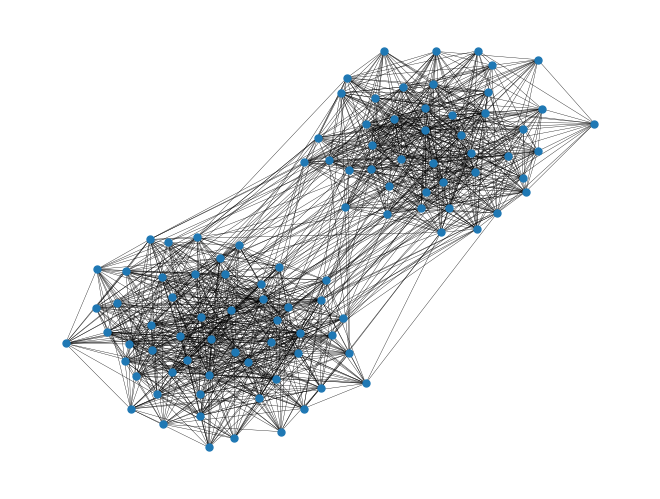

In [55]:
dataset_name = "data/example2.dat"

data_raw = nx.read_edgelist(dataset_name, delimiter=",", nodetype=int, data=(("weight", int), ))
data = nx.Graph()
data.add_nodes_from(sorted(data_raw.nodes.keys()))
data.add_edges_from(data_raw.edges)

nx.draw(data, node_size=25, width=0.25)

### 1) Form the affinity matrix A

In [56]:
A = np.zeros([data.number_of_nodes(), data.number_of_nodes()])

for edge in data.edges:
    node1, node2 = edge
    A[node1 - 1, node2 - 1] = 1
    A[node2 - 1, node1 - 1] = 1
print("A:\n", A)

A:
 [[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]]


### 2) Define diagonal matrix D and L

In [57]:
D = np.diag(np.sum(A, axis=1))
D_inv = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_inv, A), D_inv)
print("D:\n", D)
print("L:\n", L)

D:
 [[23.  0.  0. ...  0.  0.  0.]
 [ 0. 17.  0. ...  0.  0.  0.]
 [ 0.  0. 26. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 17.  0.  0.]
 [ 0.  0.  0. ...  0. 23.  0.]
 [ 0.  0.  0. ...  0.  0. 33.]]
L:
 [[0.         0.05057217 0.         ... 0.         0.         0.        ]
 [0.05057217 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04756515 0.04089304 0.03413944]
 ...
 [0.         0.         0.04756515 ... 0.         0.         0.        ]
 [0.         0.         0.04089304 ... 0.         0.         0.0362977 ]
 [0.         0.         0.03413944 ... 0.         0.0362977  0.        ]]


### 3) Find k largest eigenvectors of L

In [58]:
k = 4
eigenvalues, eigenvectors = np.linalg.eigh(L) 
X = eigenvectors[:, -k:]          
print("X:\n", X)

X:
 [[ 3.91574847e-02 -7.41936424e-02  1.07125260e-01  9.75294488e-02]
 [-7.57722933e-02 -8.63304290e-03  9.42761427e-02  8.38486959e-02]
 [-1.17854339e-01 -2.94648075e-03 -9.79408259e-02  1.03695169e-01]
 [-1.07634233e-01  9.36462129e-02  9.05115150e-02  9.31926152e-02]
 [ 2.09429013e-02 -2.19123427e-01  9.22937239e-02  8.62795963e-02]
 [ 3.56613749e-02  8.12923192e-02 -8.93461991e-02  1.05670493e-01]
 [-1.38508405e-01  2.40594918e-02 -7.56851443e-02  1.11386480e-01]
 [-1.29868888e-01  3.69736860e-02  1.05826174e-01  9.31926152e-02]
 [ 8.13533909e-02  1.78425781e-01  9.61047076e-02  8.62795963e-02]
 [-5.58567139e-02  2.11442134e-01  9.57951947e-02  8.62795963e-02]
 [ 4.55225337e-02  1.27135186e-01 -1.03409383e-01  1.01681479e-01]
 [ 5.54836649e-02 -4.77895150e-02  1.14252917e-01  1.07609563e-01]
 [ 4.18229897e-02  9.20741207e-02  1.24033473e-01  1.13227703e-01]
 [-1.43376270e-01 -3.71751056e-02 -8.63469364e-02  1.01681479e-01]
 [ 5.72987475e-02 -6.39512187e-02  1.11260783e-01  1.03695

### 4) Forming normalized matrix Y using X

In [59]:
Y = np.zeros_like(X)
for i in range(k):
    norm_factor = np.linalg.norm(X[:, i])
    Y[:, i] = X[:, i] / norm_factor if norm_factor != 0 else 0
print("Y:\n", Y)

Y:
 [[ 3.91574847e-02 -7.41936424e-02  1.07125260e-01  9.75294488e-02]
 [-7.57722933e-02 -8.63304290e-03  9.42761427e-02  8.38486959e-02]
 [-1.17854339e-01 -2.94648075e-03 -9.79408259e-02  1.03695169e-01]
 [-1.07634233e-01  9.36462129e-02  9.05115150e-02  9.31926152e-02]
 [ 2.09429013e-02 -2.19123427e-01  9.22937239e-02  8.62795963e-02]
 [ 3.56613749e-02  8.12923192e-02 -8.93461991e-02  1.05670493e-01]
 [-1.38508405e-01  2.40594918e-02 -7.56851443e-02  1.11386480e-01]
 [-1.29868888e-01  3.69736860e-02  1.05826174e-01  9.31926152e-02]
 [ 8.13533909e-02  1.78425781e-01  9.61047076e-02  8.62795963e-02]
 [-5.58567139e-02  2.11442134e-01  9.57951947e-02  8.62795963e-02]
 [ 4.55225337e-02  1.27135186e-01 -1.03409383e-01  1.01681479e-01]
 [ 5.54836649e-02 -4.77895150e-02  1.14252917e-01  1.07609563e-01]
 [ 4.18229897e-02  9.20741207e-02  1.24033473e-01  1.13227703e-01]
 [-1.43376270e-01 -3.71751056e-02 -8.63469364e-02  1.01681479e-01]
 [ 5.72987475e-02 -6.39512187e-02  1.11260783e-01  1.03695

### 5) Use k-means clustering

In [60]:
labels = KMeans(n_clusters=k).fit(Y).labels_

/home/emotror/Data_Mining/ID2222-Data-Mining/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Plot the results

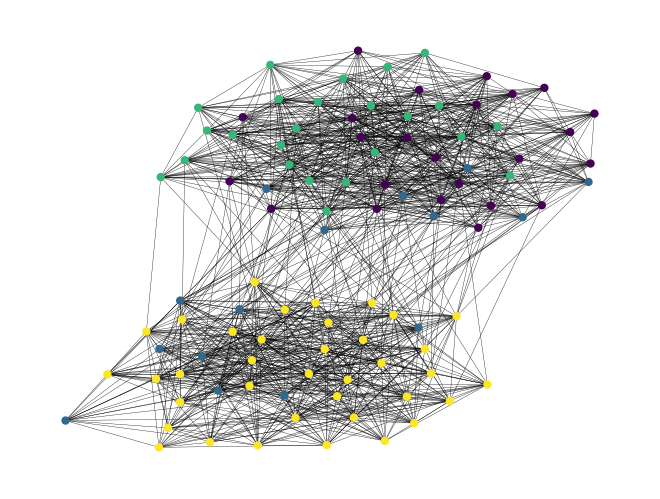

In [61]:
plt.figure()
nx.draw(data, node_size=25, width=0.25, node_color=labels)
plt.show()